In [15]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
tsla=pdr.get_data_yahoo('TSLA', start='2022-01-01')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import numpy as np

[*********************100%***********************]  1 of 1 completed


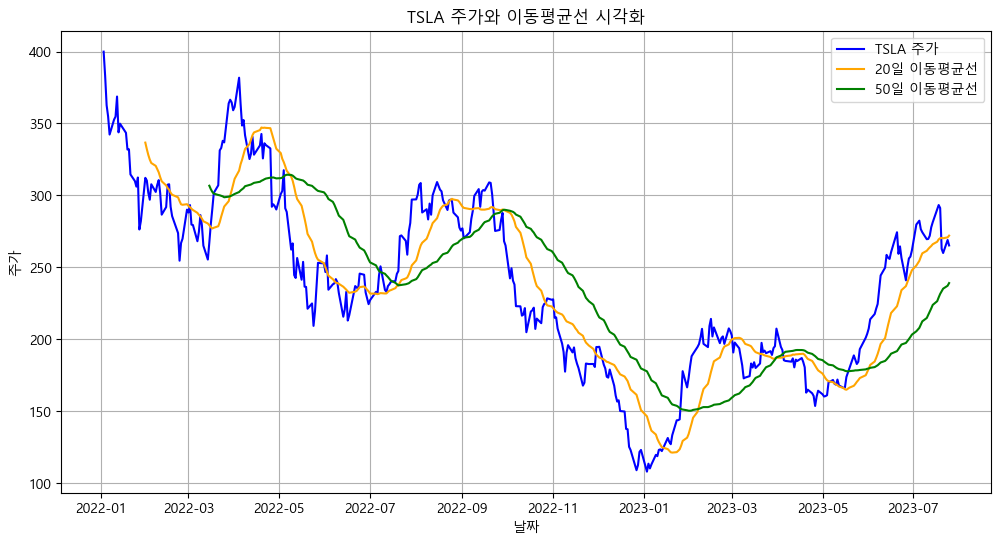

ADF Statistic: -2.4090347365141356
p-value: 0.13920264158082224
Critical Values:
   1%: -3.4476305904172904
   5%: -2.869155980820355
   10%: -2.570827146203181
p-value가 0.05보다 크므로 주가 데이터는 Non-Stationary합니다.


In [16]:
# 단기 이동평균선과 장기 이동평균선 계산
short_window = 20
long_window = 50
tsla['Short_MA'] = tsla['Close'].rolling(window=short_window).mean()
tsla['Long_MA'] = tsla['Close'].rolling(window=long_window).mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla['Close'], label='TSLA 주가', color='blue')
plt.plot(tsla.index, tsla['Short_MA'], label=f'{short_window}일 이동평균선', color='orange')
plt.plot(tsla.index, tsla['Long_MA'], label=f'{long_window}일 이동평균선', color='green')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.title('TSLA 주가와 이동평균선 시각화')
plt.legend()
plt.grid(True)
plt.show()

# Stationarity 분석
# 주가 데이터에 대한 ADF(Augmented Dickey-Fuller) 테스트를 수행하여 Stationarity 여부를 확인합니다.
from statsmodels.tsa.stattools import adfuller

result = adfuller(tsla['Close'], autolag='AIC')

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# p-value를 통해 Stationarity 여부를 확인합니다.
if result[1] <= 0.05:
    print("p-value가 0.05 이하이므로 주가 데이터는 Stationary합니다.")
else:
    print("p-value가 0.05보다 크므로 주가 데이터는 Non-Stationary합니다.")
